# Customer Churn Prediction

## 1. Introduction

**Problem Statement:** Predict customer churn using historical data and customer features.

**Objective:** Develop a model to identify customers likely to churn and help the company mitigate churn.

**Dataset Overview**: The dataset used in this project is the Telco Customer Churn dataset from Kaggle. The dataset contains information about customers who left within the last month in the _Churn_ column, services that each customer has signed up for, customer account information, and demographic info about customers.
Key features include _gender_, _tenure_, _MonthlyCharges_, _Contract_, and _Churn_ (target).

**Libraries Used**: The following libraries have been used in this project:
* pandas
* numpy
* matplotlib
* seaborn
* sklearn

In [103]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## 2. Data Loading and Overview

In [6]:
# Loading the dataset
data = pd.read_csv('F:/Projects/ML-Portfolio-Project/WA_Fn-UseC_-Telco-Customer-Churn.csv')

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Checking for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Column types and summary statistics
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 3. Exploratory Data Analysis (EDA)

### A. Univariate Analysis

#### Target Distribution:

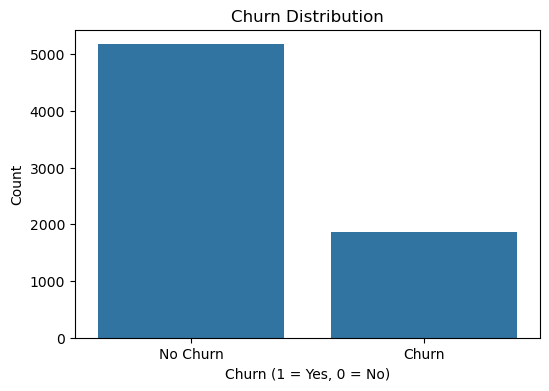

In [10]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Churn', data = data)
plt.title('Churn Distribution')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

#### Distribution of Numerical Features:

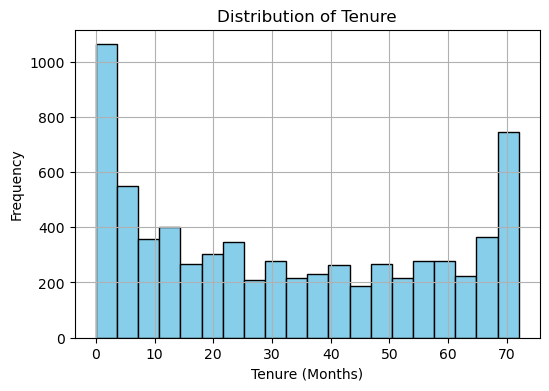

In [12]:
# Distribution of Tenure
plt.figure(figsize = (6, 4))
data['tenure'].hist(bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

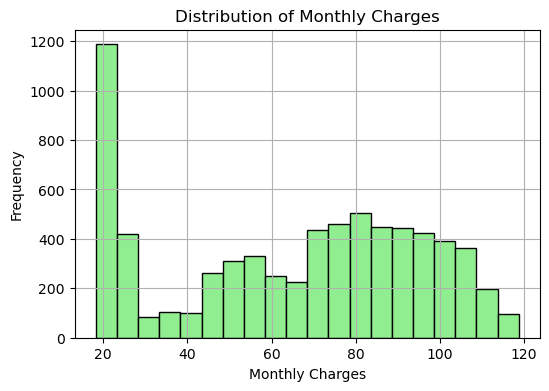

In [13]:
# Distribution of Monthly Charges
plt.figure(figsize = (6, 4))
data['MonthlyCharges'].hist(bins = 20, color = 'lightgreen', edgecolor = 'black')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

#### Categorical Feature Counts:

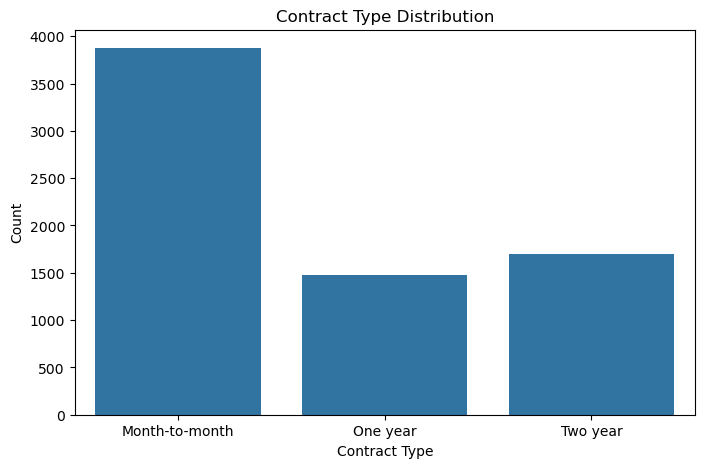

In [15]:
# Contract Type
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Contract', data = data)
plt.title('Contract Type Distribution')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

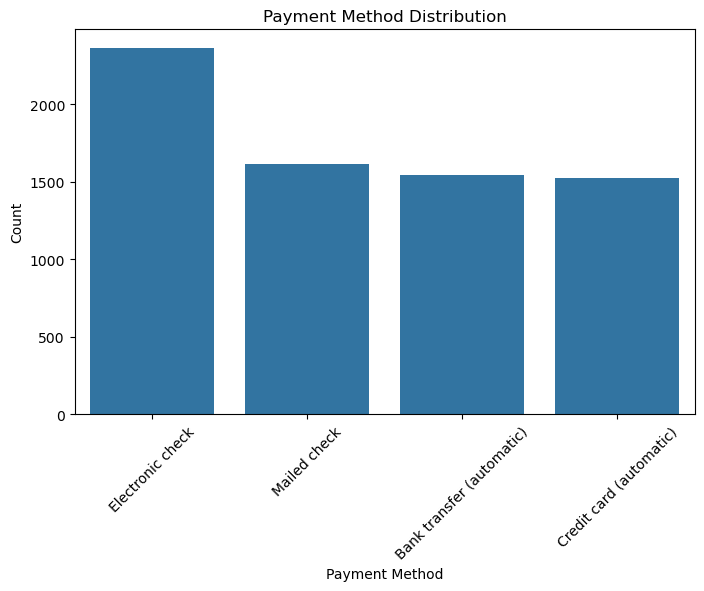

In [16]:
# Payment Method
plt.figure(figsize = (8, 5))
sns.countplot(x = 'PaymentMethod', data = data)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

### B. Bivariate Analysis

#### Churn vs Key Features:

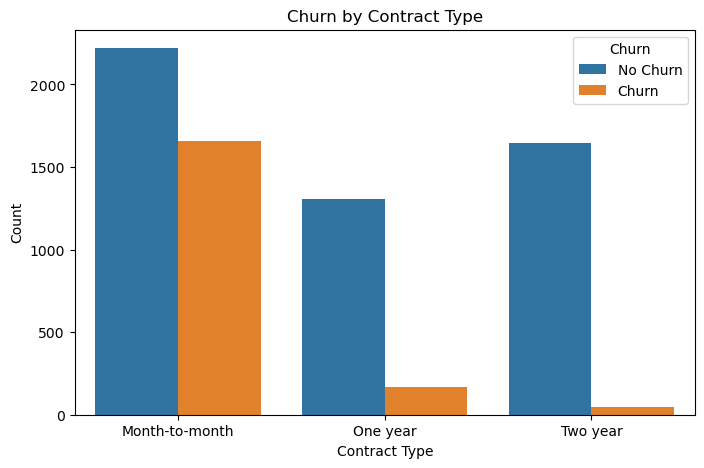

In [18]:
# Churn vs Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

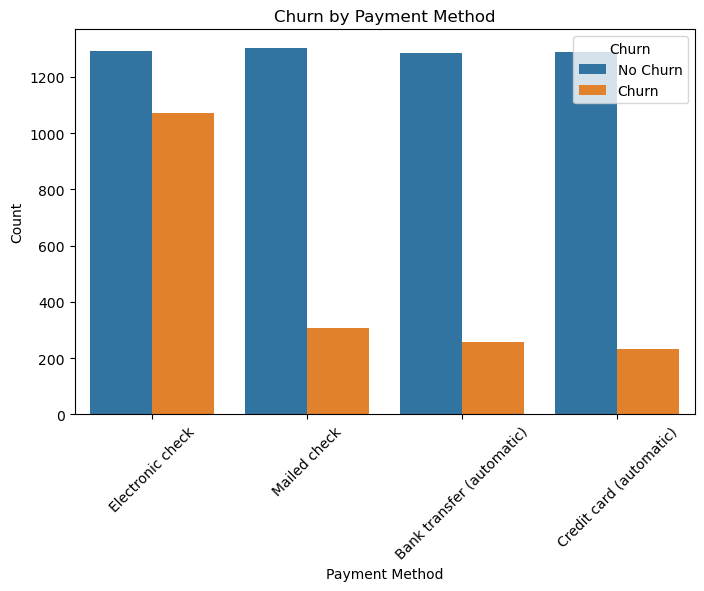

In [19]:
# Churn vs Payment Method
plt.figure(figsize=(8, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.show()

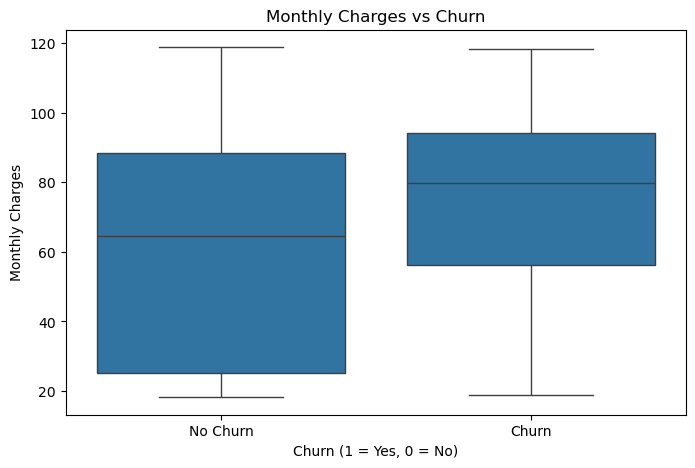

In [20]:
# Boxplot of Monthly Charges vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Monthly Charges')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

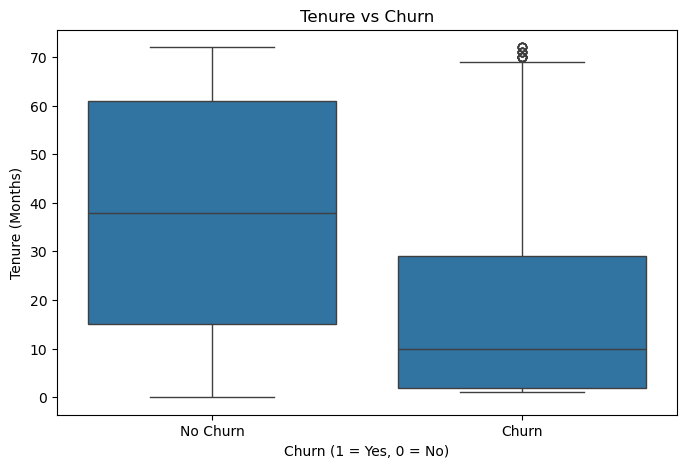

In [21]:
# Boxplot of Tenure vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure vs Churn')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Tenure (Months)')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

### C. Correlation Analysis

#### Correlation Matrix:

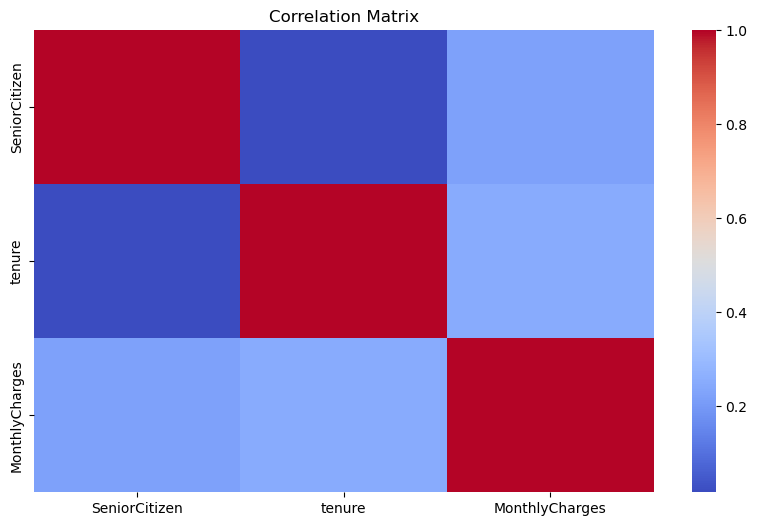

In [23]:
numerical_data = data.select_dtypes(include = ['float64', 'int64'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize = (10, 6))
sns.heatmap(correlation_matrix, fmt='.2f', cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 4. Data Preprocessing

In [25]:
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [42]:
print(data['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
data.info()

In [54]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print(data['TotalCharges'].isnull().sum())

11


In [ ]:
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

In [58]:
data.drop('customerID', axis=1, inplace=True)

categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns to encode:", categorical_columns)

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

Categorical columns to encode: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [60]:
X = data_encoded.drop('Churn', axis = 1)
y = data_encoded['Churn']

In [62]:
print(X.shape)
print(y.shape)

(7043, 30)
(7043,)


## 5. Model Selection and Training

In [67]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [69]:
# Defining categorical and numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [79]:
# Creating Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Model Selection
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [93]:
# Training Logistic Regression Model
log_reg.fit(X_train, y_train)

# Training Random Forest Model
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  [])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [83]:
# Predictions and Evaluation for Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)

# Classification Report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1539
           1       0.68      0.45      0.54       574

    accuracy                           0.79      2113
   macro avg       0.75      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



In [85]:
# Predictions and Evaluation for Random Forest
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Classification Report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1539
           1       0.59      0.45      0.51       574

    accuracy                           0.76      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.75      0.76      0.75      2113



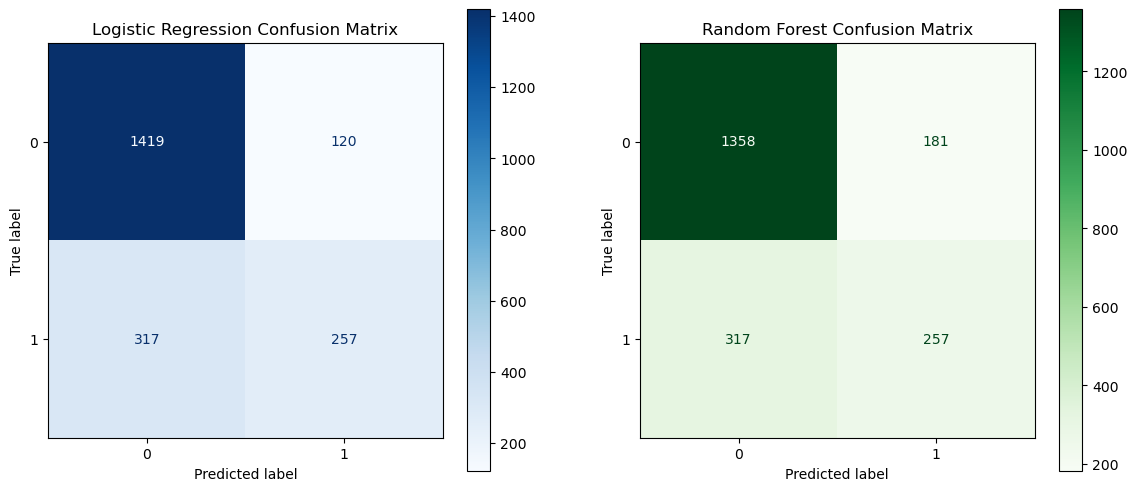

In [89]:
# Confusion Matrix for both models
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
ConfusionMatrixDisplay(cm_log_reg).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Logistic Regression Confusion Matrix')

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(ax=ax[1], cmap='Greens')
ax[1].set_title('Random Forest Confusion Matrix')

plt.show()

In [99]:
# Hyperparameter Tuning with GridSearchCV

# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Initializing GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fitting GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Getting the best parameters and model
best_rf = grid_search_rf.best_estimator_
print(f"Best parameters from GridSearchCV for Random Forest: {grid_search_rf.best_params_}")

# Evaluating the best model from GridSearchCV
y_pred_best_rf = best_rf.predict(X_test)

# Classification Report for the best Random Forest model
print("Best Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters from GridSearchCV for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.46      0.54       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



In [105]:
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)

print(f"Best Random Forest - Accuracy: {accuracy_best_rf:.4f}")
print(f"Best Random Forest - Precision: {precision_best_rf:.4f}")
print(f"Best Random Forest - Recall: {recall_best_rf:.4f}")
print(f"Best Random Forest - F1 Score: {f1_best_rf:.4f}")

Best Random Forest - Accuracy: 0.7894
Best Random Forest - Precision: 0.6600
Best Random Forest - Recall: 0.4634
Best Random Forest - F1 Score: 0.5445


In [122]:
# Hyperparameter Tuning for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs']
}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print("Best parameters (Logistic Regression):", grid_lr.best_params_)

y_pred_lr = grid_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

best_lr = grid_lr.best_estimator_

# Evaluating the best model from GridSearchCV
y_pred_best_lr = best_lr.predict(X_test)

# Classification Report for the best Logistic Regression Model
print("Best Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_best_lr))

print("Best Logistic Regression Accuracy Score: {}".format(accuracy_score(y_test, y_pred_best_lr)))

Best parameters (Logistic Regression): {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
[[1425  114]
 [ 321  253]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1539
           1       0.69      0.44      0.54       574

    accuracy                           0.79      2113
   macro avg       0.75      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113

Best Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1539
           1       0.69      0.44      0.54       574

    accuracy                           0.79      2113
   macro avg       0.75      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113

Best Logistic Regression Accuracy Score: 0.7941315664931378


## 6. Conclusion
In this project, we developed and compared two machine learning models—Logistic Regression and Random Forest—to predict customer churn. Both models achieved an accuracy of 79%, but there were differences in other evaluation metrics:

Logistic Regression had a higher precision for predicting customers who would churn (0.69 vs. 0.66 for Random Forest), meaning it was more likely to correctly identify customers at risk of churning.
Random Forest achieved a slightly higher recall for the churn class (0.46 vs. 0.44 for Logistic Regression), indicating it was better at identifying more of the actual churners.
However, both models showed room for improvement in terms of recall for predicting churners, with relatively low values (below 0.50). This suggests that while the models can identify customers who are not likely to churn (Class 0) fairly well, they struggle more with correctly identifying customers who are likely to churn (Class 1).
